### **Importing the Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
import missingno as mn
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


### **Loading the Dataset**

In [2]:
hotelDataset = pd.read_excel("/content/hotels.xlsx") #Enter your required dataset here

### **Viewing the Dataset**

In [3]:
#Describing the Dataset
hotelDataset

,ID,Hotel name,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares,City
0,1,Europe,139,5,350,8.3,1,25,Sarajevo
1,2,Europe,187,5,350,8.3,2,40,Sarajevo
2,3,Hills,255,5,10000,8.5,3,42,Sarajevo
3,4,Hills,141,5,10000,8.5,2,42,Sarajevo
4,5,Boutique,117,4,450,8.7,1,15,Sarajevo
...,...,...,...,...,...,...,...,...,...
115,116,WUD Hotel,121,3,3200,8.9,2,40,Ljubljana
116,117,uHotel,161,4,250,9.0,1,28,Ljubljana
117,118,Allegro Hotel,106,4,550,8.5,1,35,Ljubljana
118,119,M Hotel,123,4,2400,8.4,1,31,Ljubljana


**Displaying the statistics of the input dataset**

In [4]:
hotelDataset.describe()

,ID,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares
count,120.000000,120.000000,120.000000,120.00000,120.00000,120.000000,120.000000
mean,60.500000,153.341667,3.625000,2353.75000,8.64250,2.000000,27.525000
std,34.785054,79.444235,0.799816,2437.27326,0.61694,0.916698,10.496068
min,1.000000,39.000000,2.000000,150.00000,6.50000,1.000000,10.000000
25%,30.750000,99.500000,3.000000,450.00000,8.40000,1.000000,20.000000
50%,60.500000,140.000000,4.000000,1550.00000,8.70000,2.000000,26.000000
75%,90.250000,180.000000,4.000000,3400.00000,9.00000,2.250000,35.000000
max,120.000000,474.000000,5.000000,10000.00000,9.70000,4.000000,60.000000


**Displaying the Metadata of the Dataset**

In [5]:
hotelDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 120 non-null    int64  
 1   Hotel name         120 non-null    object 
 2   Price(BAM)         120 non-null    int64  
 3   Hotel star rating  120 non-null    int64  
 4   Distance           120 non-null    int64  
 5   Customer rating    120 non-null    float64
 6   Rooms              120 non-null    int64  
 7   Squares            120 non-null    int64  
 8   City               120 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 8.6+ KB


In [6]:
hotelDataset.value_counts() #Displaying counts of unique values

ID   Hotel name           Price(BAM)  Hotel star rating  Distance  Customer rating  Rooms  Squares  City     
1    Europe               139         5                  350       8.3              1      25       Sarajevo     1
2    Europe               187         5                  350       8.3              2      40       Sarajevo     1
89   Hotel Union          49          3                  400       8.9              1      19       Belgrade     1
88   Tullip Inn Putnik    108         3                  4100      8.2              1      32       Belgrade     1
87   Hotel Moskva         155         4                  400       9.0              1      29       Belgrade     1
                                                                                                                ..
36   Best western         105         3                  9000      8.9              1      13       Zagreb       1
35   Zagreb               76          2                  3500      6.9              1

In [7]:
#to check for missing values in each column.
hotelDataset.isnull().sum()

ID                   0
Hotel name           0
Price(BAM)           0
Hotel star rating    0
Distance             0
Customer rating      0
Rooms                0
Squares              0
City                 0
dtype: int64

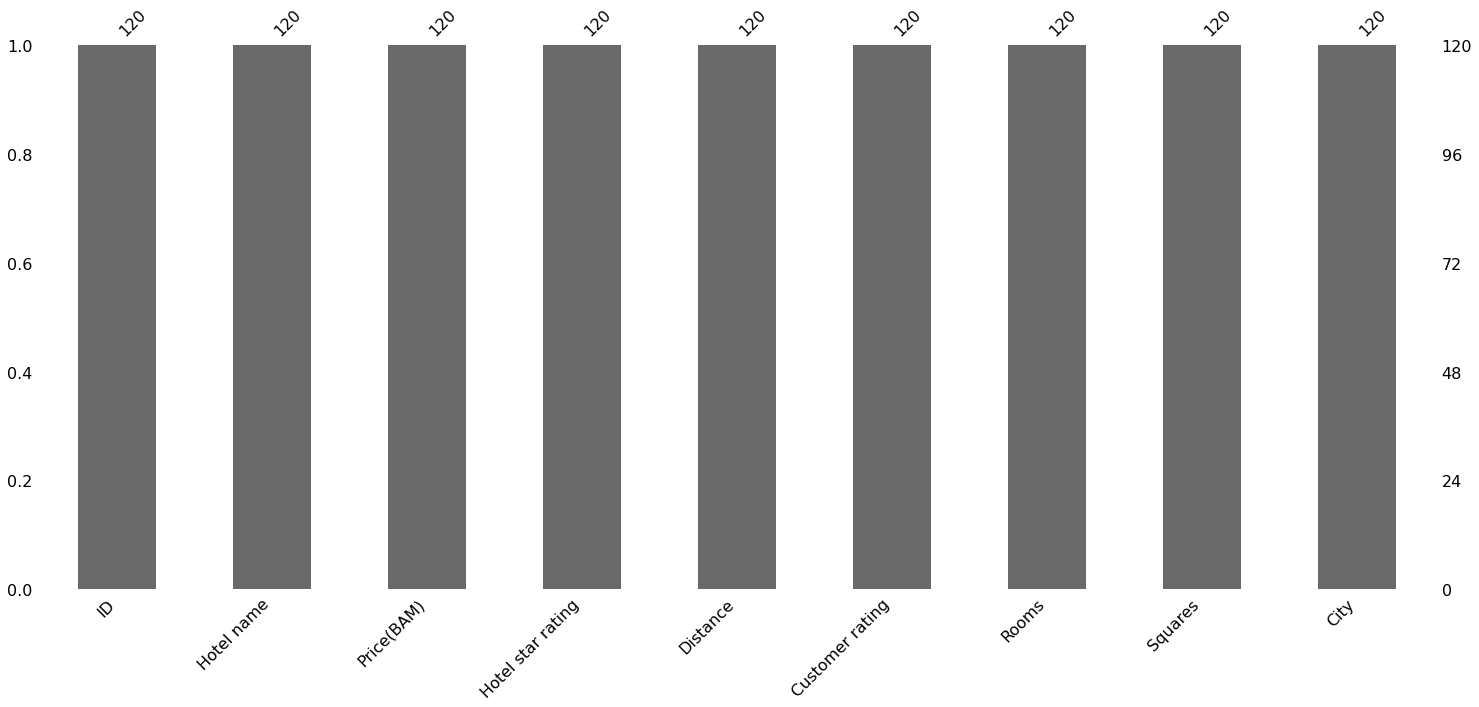

In [9]:
# visualizing null values
mn.bar(hotelDataset)
plt.show()

### **Creating Numerical and Categorical Data**

In [11]:
# creating numerical and categorical dataframes

categoricalColumns = [col for col in hotelDataset.columns if hotelDataset[col].dtype == 'O']
categoricalColumns

['Hotel name', 'City']

In [12]:
categoricalData = hotelDataset[categoricalColumns]
categoricalData.head()

,Hotel name,City
0,Europe,Sarajevo
1,Europe,Sarajevo
2,Hills,Sarajevo
3,Hills,Sarajevo
4,Boutique,Sarajevo


In [14]:
# printing unique values of each column
for col in categoricalData.columns:
    print(f"{col}: \n{categoricalData[col].unique()}\n")

Hotel name: 
['Europe' 'Hills' 'Boutique' 'Radon plaza' 'Holiday inn' 'Grand' 'Hayat'
 'Brkic' 'Saraj' 'Old town' 'Ruža' 'Riverside residence' 'Bristol'
 'Opal home' 'Hollywood' 'Fala' 'Zagreb' 'Best western' 'Forty two'
 'Viena' 'Palace' 'International' 'Garden' 'Esplanade' 'Double tree'
 'Dubrovnik' 'Academia' 'Rebro' 'Orient ekspres' 'The loop'
 'Public House Hotel\xa0' 'Envoy Hotel' 'Hilton Belgrade\xa0'
 'Hotel Bohemian Garni - Skadarlija' 'Mama Shelter Belgrade\xa0'
 'Hotel N\xa0' 'Hotel Rex\xa0' 'Room 25 Belgrade\xa0'
 'Garni Hotel Apart K\xa0' 'City Code Exclusive\xa0'
 'Hotel Avalon Garni\xa0' 'Hyatt' 'Square nine' 'Metropol palace'
 'Hotel Majestic' 'Saint Ten Hotel' 'In Hotel ' 'Falkensteiner Hotel'
 'Hotel Moskva' 'Tullip Inn Putnik' 'Hotel Union' 'Hotel Elegance'
 'Hotel Emonec\xa0' 'Atelier Hotel\xa0' 'Adora Hotel'
 'Hotel Center Ljubljana\xa0' 'Hotel Lev'
 'Best Western Premier Hotel Slon' 'Radisson Blu Plaza Hotel Ljubljana'
 'City Hotel Ljubljana' 'Bit Center Hotel' 'H

### **Plotting Visually**

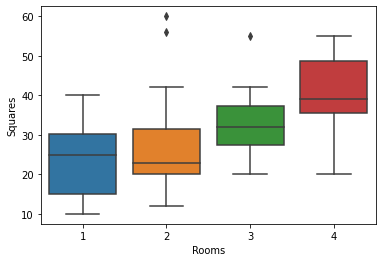

In [15]:
sb.boxplot(data=hotelDataset, x="Rooms", y="Squares")

In [16]:
hotelDataset['MEDV'] = hotelDataset.Distance

In [17]:
print(hotelDataset)

      ID           Hotel name  Price(BAM)  Hotel star rating  Distance  \
0      1               Europe         139                  5       350   
1      2               Europe         187                  5       350   
2      3                Hills         255                  5     10000   
3      4                Hills         141                  5     10000   
4      5             Boutique         117                  4       450   
..   ...                  ...         ...                ...       ...   
115  116            WUD Hotel         121                  3      3200   
116  117               uHotel         161                  4       250   
117  118        Allegro Hotel         106                  4       550   
118  119              M Hotel         123                  4      2400   
119  120  Austria Trend Hotel         137                  4      3500   

     Customer rating  Rooms  Squares       City   MEDV  
0                8.3      1       25   Sarajevo    350

In [19]:
#Correlation between different variables
#Correlation is a way to determine if two variables in a dataset are related in any way.
corr = hotelDataset.corr()

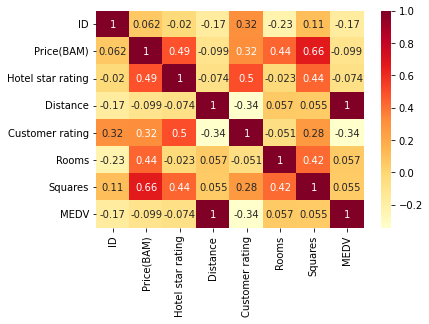

In [20]:
sb.heatmap(hotelDataset.corr(), cmap="YlOrRd", annot=True)

In [21]:
plt.show()

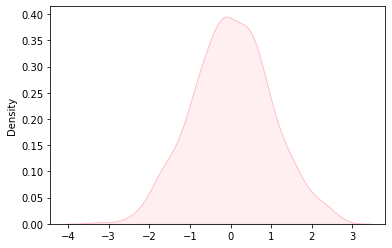

In [22]:
#KDE Plot  as Kernel Density Estimate  is a graphical way to visualise our data 
#as the Probability Density of a continuous variable. It is an effort to analyse 
#the model data to understand how the variables are distributed.
data = np.random.randn(500)
res = sb.kdeplot(data , color='pink' , shade = True)

### **Working of Model**

In [25]:
features = hotelDataset[['Hotel star rating','Distance','Customer rating','Rooms','Squares']]
desiredOutput = hotelDataset['Price(BAM)']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
x_train, x_test, y_train, y_test = train_test_split(features, desiredOutput, test_size = 0.33,random_state = 5 )

In [27]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
71,89,143.272711
59,95,82.963565
39,133,113.402442
10,167,222.334935
93,117,193.199009
23,96,168.608374
57,108,72.807495
42,178,161.968129
56,178,189.585422
74,80,222.894583


In [28]:
print(regressor.coef_)

[ 3.34330050e+01 -4.64037607e-03  9.13358484e+00  3.27412442e+01
  2.56477193e+00]


In [29]:
m = regressor.coef_

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual   Predicted
71       89  143.272711
59       95   82.963565
39      133  113.402442
10      167  222.334935
93      117  193.199009
23       96  168.608374
57      108   72.807495
42      178  161.968129
56      178  189.585422
74       80  222.894583
28       96  115.447668
35      105   39.542657
17       39  -14.224515
79      211  173.640164
63      474  286.012222
6       137  176.907440
110     166  164.486943
87      108  104.617657
119     137  151.444582
89       53   90.532838
20      108   82.147968
49      226  262.245447
43      122  163.876691
66       59   98.751866
37       98  116.786162
48      143  201.291711
98      192  167.854403
112     160  140.932304
92      120  117.073944
46      158  202.514968
60      143  171.403013
22      212  271.583243
64       58  121.673618
81      137  238.805430
70       93  176.013956
115     121  168.446924
52      190  200.657010
45      110  144.126004
12       62   63.136288
32      133  112.879875


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
ms = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mm = metrics.r2_score(y_test, y_pred)

In [34]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {ms:.2f}')
print(f'r2_score: {mm:.2f}')

Mean absolute error: 42.94
Mean squared error: 3218.09
Root mean squared error: 56.73
r2_score: 0.35


In [37]:
x1 = np.array(x_test['Hotel star rating'])
y1 = np.array(y_pred)

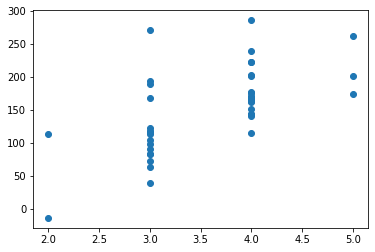

In [38]:
plt.plot(x1, y1, 'o')

In [39]:
m, b = np.polyfit(x1, y1, 1)

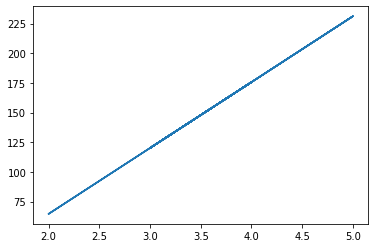

In [40]:
plt.plot(x1, m*x1 + b)

Text(0, 0.5, 'Price(BAM)')

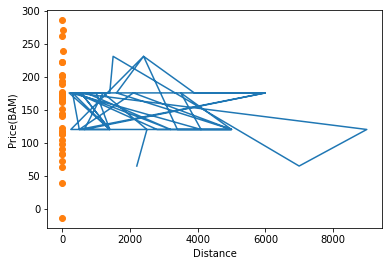

In [41]:
plt.plot(x_test['Distance'], m*x_test['Hotel star rating'] + b)
plt.plot(x_test['Rooms'],y_pred,'o')
plt.xlabel("Distance")
plt.ylabel("Price(BAM)")
